In [1]:
# https://www.kaggle.com/competitions/pgsfashionmnist
import pandas as pd
from img_classificator import SimpleImgClassificatorManager
from keras.optimizers import RMSprop

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_df = pd.read_csv('./input/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('./input/fashion-mnist_test.csv', sep=',')
test_df


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Metal device set to: Apple M1


2023-03-13 16:00:13.832007: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-13 16:00:13.832251: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(Preprocessing: Done in 0.56 secs)
Epoch 1/100


2023-03-13 16:00:14.717001: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 47s 120ms/step - loss: 0.5823 - accuracy: 0.7847 - val_loss: 2.3689 - val_accuracy: 0.4412 - lr: 5.0000e-04
Epoch 2/100
375/375 [==============================] - 44s 118ms/step - loss: 0.4087 - accuracy: 0.8497 - val_loss: 0.3034 - val_accuracy: 0.8841 - lr: 5.0000e-04
Epoch 3/100
375/375 [==============================] - 44s 119ms/step - loss: 0.3612 - accuracy: 0.8672 - val_loss: 0.2650 - val_accuracy: 0.9016 - lr: 5.0000e-04
Epoch 4/100
375/375 [==============================] - 44s 117ms/step - loss: 0.3319 - accuracy: 0.8780 - val_loss: 0.2899 - val_accuracy: 0.8853 - lr: 5.0000e-04
Epoch 5/100
375/375 [==============================] - 44s 118ms/step - loss: 0.3086 - accuracy: 0.8842 - val_loss: 0.2768 - val_accuracy: 0.8916 - lr: 5.0000e-04
Epoch 6/100
375/375 [==============================] - 44s 117ms/step - loss: 0.2949 - accuracy: 0.8920 - val_loss: 0.2349 - val_accuracy: 0.9133 - lr: 5.0000e-04
Epoch 7/100
375/375 [=============

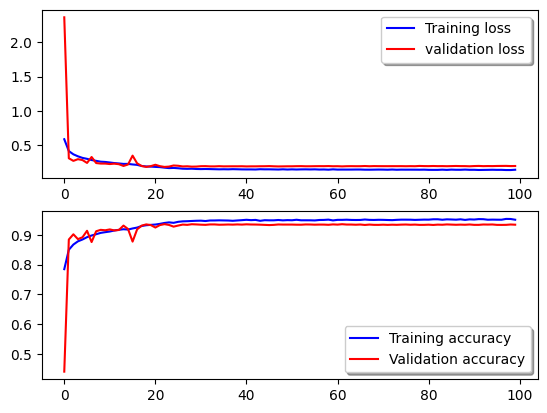

In [1]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

# model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

In [ ]:
import joblib

filename = "cnn-model03-final.joblib"
joblib.dump(model, filename)

print("Model saved.")

In [ ]:
def prep_submissions(preds_array, file_name='submission.csv'):
    preds_df = pd.DataFrame(preds_array)
    predicted_labels = preds_df.idxmax(axis=1) #convert back one hot encoding to categorical variabless
    return predicted_labels

y_test, y_pred = manager.predict_report()

test_preds_labels = prep_submissions(y_pred)
test_preds_labels.to_csv("submission.csv")

test_preds_labels

Metal device set to: Apple M1


2023-03-14 08:49:27.192217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-14 08:49:27.192795: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(Preprocessing: Done in 0.69 secs)
Epoch 1/50


2023-03-14 08:49:28.281179: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 49s 127ms/step - loss: 0.5861 - accuracy: 0.7868 - val_loss: 1.9756 - val_accuracy: 0.4572 - lr: 5.0000e-04
Epoch 2/50
375/375 [==============================] - 46s 123ms/step - loss: 0.4144 - accuracy: 0.8467 - val_loss: 0.3505 - val_accuracy: 0.8733 - lr: 5.0000e-04
Epoch 3/50
375/375 [==============================] - 45s 121ms/step - loss: 0.3603 - accuracy: 0.8666 - val_loss: 0.3449 - val_accuracy: 0.8637 - lr: 5.0000e-04
Epoch 4/50
375/375 [==============================] - 46s 122ms/step - loss: 0.3336 - accuracy: 0.8757 - val_loss: 0.2754 - val_accuracy: 0.8979 - lr: 5.0000e-04
Epoch 5/50
375/375 [==============================] - 46s 122ms/step - loss: 0.3114 - accuracy: 0.8859 - val_loss: 0.2341 - val_accuracy: 0.9175 - lr: 5.0000e-04
Epoch 6/50
375/375 [==============================] - 47s 126ms/step - loss: 0.2920 - accuracy: 0.8921 - val_loss: 0.3290 - val_accuracy: 0.8699 - lr: 5.0000e-04
Epoch 7/50
375/375 [===================

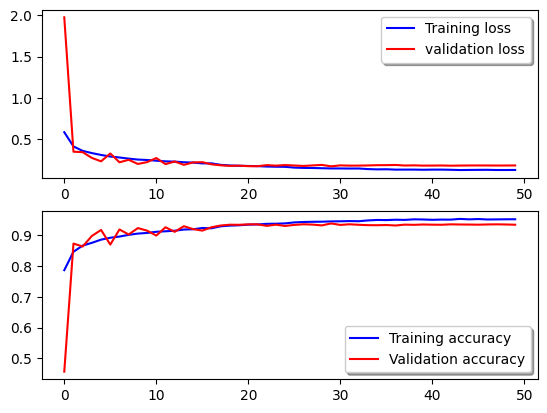

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

# model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

In [3]:
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

Epoch 1/50
375/375 [==============================] - 47s 122ms/step - loss: 0.3382 - accuracy: 0.8770 - val_loss: 0.2513 - val_accuracy: 0.9033 - lr: 5.0000e-04
Epoch 2/50
313/375 [========================>.....] - ETA: 7s - loss: 0.2403 - accuracy: 0.9100

KeyboardInterrupt: 